# Progetto di  Applicazioni Data Intensive

Progetto svolto nell'anno accademico 2024-2025 da:
- Filippo Massari 00010714020
- Francesco Pazzaglia 0001077423

## Introduzione
I dati presi in esame riguardano lo stile di vita di circa 80.000 studenti includendo dati come: l'ambiente di studio, la salute mentale, background familiare, motivazione e fattori ambientali.

Il dataset è stato preso su [Kaggle](https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset).

Ci poniamo come obiettivo quello di sfruttare i dati precedentemente descritti per ricavarne una predizione delle performance studentesche del soggetto preso in analisi. 

## Implementazione

### Caricamento delle librerie

Per prima cosa importiamo le librerie che ci serviranno per poter manipolare ed effettuare operazioni sui dati ottenuti all'interno del dataset. Tra cui:

- *NumPy* per l'elaborazione numerica in Python di array e matrici;

- *pandas* per l'importazione ed esportazione dei dati;

- *matplotlib* per la rappresentazione grafica dei risultati ottenuti;
    - importiamo il modulo di matplotlib inline per far in modo che gli output vengano renderizzati direttamente nel file Jupyter piuttosto che all'esterno

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Caricamento dei dati

Carichiamo il dataset delle abitudini degli studenti, che contiene informazioni dettagliate sulle loro routine quotidiane, le attività accademiche, lo stile di vita e altri fattori che possono influenzare le loro performance scolastiche.

In [188]:
import os.path
file = "./data/enhanced_student_habits_performance_dataset.csv"
if not os.path.exists(file):
    print("Missing datasets, retrievit from kaggle: https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset")
    
students = pd.read_csv(file, index_col=0)

In [189]:
print(students.columns.tolist())

['age', 'gender', 'major', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'previous_gpa', 'semester', 'stress_level', 'dropout_risk', 'social_activity', 'screen_time', 'study_environment', 'access_to_tutoring', 'family_income_range', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'learning_style', 'time_management_score', 'exam_score']


### Significato delle colonne del Dataset

Certo, ecco la tabella numerata mantenendo il formato:

| #  | Variabile                          | Descrizione                                                                 |
|----|------------------------------------|-----------------------------------------------------------------------------|
| 0  | **student_id**                     | Codice unico ed identificativo dello studente                               |
| 1  | **age**                            | Età dello studente (16–28 anni)                                             |
| 2  | **gender**                         | Genere: Maschile, Femminile o Altro                                         |
| 3  | **major**                          | Corso di laurea o area di studio (es. Informatica, Ingegneria, Arti)        |
| 4  | **study_hours_per_day**            | Ore medie di studio giornaliere                                             |
| 5  | **social_media_hours**             | Ore trascorse sui social media                                              |
| 6  | **netflix_hours**                  | Ore trascorse a guardare Netflix                                            |
| 7  | **part_time_job**                  | Se lo studente ha un lavoro part-time (Sì/No)                               |
| 8  | **attendance_percentage**          | Percentuale di frequenza alle lezioni                                       |
| 9  | **sleep_hours**                    | Ore di sonno giornaliere                                                    |
| 10 | **diet_quality**                   | Qualità della dieta                                                         |
| 11 | **exercise_frequency**             | Frequenza dell’attività fisica                                              |
| 12 | **parental_education_level**       | Livello di istruzione dei genitori                                          |
| 13 | **internet_quality**               | Qualità della rete Internet                                                 |
| 14 | **mental_health_rating**           | Valutazione dello stato di salute mentale (1–10)                            |
| 15 | **extracurricular_participation**  | Partecipazione ad attività extracurriculari                                 |
| 16 | **previous_gpa**                   | Media dei voti precedenti                                                   |
| 17 | **semester**                       | Semestre dello studente                                                     |
| 18 | **stress_level**                   | Livello di stress (1–10)                                                    |
| 19 | **dropout_risk**                   | Rischio di abbandono degli studi (Sì/No) — derivato da stress e motivazione |
| 20 | **social_activity**                | Numero di eventi sociali settimanali                                        |
| 21 | **screen_time**                    | Tempo complessivo trascorso davanti agli schermi                            |
| 22 | **study_environment**              | Ambiente abituale di studio                                                 |
| 23 | **access_to_tutoring**             | Accesso a servizi di tutoraggio (Sì/No)                                     |
| 24 | **family_income_range**            | Fascia di reddito familiare                                                 |
| 25 | **parental_support_level**         | Livello di supporto da parte dei genitori                                   |
| 26 | **motivation_level**               | Livello di motivazione (1–10)                                               |
| 27 | **exam_anxiety_score**             | Punteggio di ansia da esame (1–10)                                          |
| 28 | **learning_style**                 | Stile di apprendimento preferito                                            |
| 29 | **time_management_score**          | Punteggio di capacità di gestione del tempo (1–10)                          |
| 30 | **exam_score**                     | **Valore da predire: punteggio all’esame**                                  |

In [190]:
students

,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
student_id,,,,,,,,,,,,,,,,,,,,,
100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,Poor,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,Good,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,Good,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,Fair,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,Good,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,16,Male,Engineering,3.700000,2.1,1.0,Yes,80.8,6.1,Fair,...,8.3,Library,No,Low,1,4,10,Auditory,5.3,88
179996,16,Female,Business,1.200000,0.4,2.9,No,99.5,4.1,Good,...,4.7,Co-Learning Group,No,Low,3,2,10,Kinesthetic,6.8,52
179997,26,Female,Arts,4.100000,1.6,1.6,Yes,46.1,8.3,Good,...,7.5,Dorm,No,Medium,7,1,10,Visual,1.3,89


Procediamo a verificare la presenza o meno di tutti i valori delle colonne del dataset.

In [191]:
missing_values = students.isnull().sum()
print("Valori mancanti per colonna:")
print(missing_values[missing_values > 0])

Valori mancanti per colonna:
Series([], dtype: int64)


Il dataset non contiene valori mancanti, questo ci permette di utilizzare tutte le colonne senza problemi.

In [192]:
students.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 100000 to 179999
Columns: 30 entries, age to exam_score
dtypes: float64(10), int64(8), object(12)
memory usage: 68.4 MB


Definiamo l’elenco delle colonne da trattare come categorical e al caricamento ne specifichiamo il tipo. Andiamo infine a ricalcolare la dimensione del file costatando una netta diminuzione dello spazio occupato rispetto all'originale.

In [193]:
cols_to_cat = [
    'gender', 'major', 'part_time_job', 'diet_quality',
    'study_environment', 'access_to_tutoring',
    'family_income_range', 'parental_support_level',
    'parental_education_level', 'learning_style'
]

dtype = {col: 'category' for col in cols_to_cat}
students = pd.read_csv(file, dtype=dtype)

for col in cols_to_cat:
    students[col] = students[col].astype('category')

students.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 31 entries, student_id to exam_score
dtypes: category(10), float64(10), int64(8), object(3)
memory usage: 25.5 MB


Questo passaggio garantisce il mantenimento dell'integrità semantica dei dati e della loro fruibilità riducendo al contempo lo spazio occupato dal dataset.

### Preparazione dati

In [194]:
students.head(1)

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100


Riteniamo che alcune colonne del dataset siano assimilabili per similarità dei dati forniti, quindi procediamo ad accorparle per attinenza semantica. 

In [195]:
students["screen_entertainment_hours"] = students["social_media_hours"] + students["netflix_hours"]
students.drop(columns=["social_media_hours", "netflix_hours"], inplace=True)
ent = students.pop("screen_entertainment_hours")
students.insert(loc=5, column="screen_entertainment_hours", value=ent)

Estraiamo inoltre il tempo di utilizzo di tecnologie dedicato ad attività produttive o con attinenza scolastica, dato interesante per i nostri fini.

In [196]:
students["screen_productivity_hours"] = students["screen_time"] - students["screen_entertainment_hours"]
students["screen_productivity_hours"] = students["screen_productivity_hours"].clip(lower=0, upper=24)
prod = students.pop("screen_productivity_hours")
students.insert(loc=6, column="screen_productivity_hours", value=prod)

Per via dell'approsimazione decimale dovuta al cast implicito dei tipi di python diversi otteniamo, in alcuni isolati casi, dei valori fuori scala che procediamo a normalizzare.

In [197]:
outlier_screen_productivity = students[(students['screen_productivity_hours'] < 0) | 
                                       (students['screen_productivity_hours'] > 24)]

In [198]:
students.head(1)

,student_id,age,gender,major,study_hours_per_day,screen_entertainment_hours,screen_productivity_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.1,7.8,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100


In [199]:
category_order = [
    "Identifiers",
    "Demographics",
    "Academic Engagement",
    "Lifestyle & Health",
    "Screen Activity",
    "Family & Socioeconomic Support",
    "Personal Skills",
    "Behavior & Preferences",
    "Outcomes"
]


category_map = {
    "student_id": "Identifiers",

    "age":       "Demographics",
    "gender":    "Demographics",
    "major":     "Demographics",

    "semester":                      "Academic Engagement",
    "study_hours_per_day":           "Academic Engagement",
    "attendance_percentage":         "Academic Engagement",
    "access_to_tutoring":            "Academic Engagement",
    "extracurricular_participation": "Academic Engagement",
    "previous_gpa":                  "Academic Engagement",


    "sleep_hours":          "Lifestyle & Health",
    "diet_quality":         "Lifestyle & Health",
    "exercise_frequency":   "Lifestyle & Health",
    "mental_health_rating": "Lifestyle & Health",
    "stress_level":         "Lifestyle & Health",
    "exam_anxiety_score":   "Lifestyle & Health",

    "screen_time":                "Screen Activity",
    "screen_productivity_hours":  "Screen Activity",
    "screen_entertainment_hours": "Screen Activity",
    "social_activity":            "Screen Activity",

    "family_income_range":      "Family & Socioeconomic Support",
    "parental_education_level": "Family & Socioeconomic Support",
    "parental_support_level":   "Family & Socioeconomic Support",
    "internet_quality":         "Family & Socioeconomic Support",
    
    
    "time_management_score": "Personal Skills",
    "motivation_level":      "Personal Skills",
    "learning_style":        "Personal Skills",

    
    "part_time_job":      "Behavior & Preferences",
    "dropout_risk":       "Behavior & Preferences",
    "study_environment":  "Behavior & Preferences",

    "exam_score":   "Outcomes"
}


In [200]:
missing_cols = [col for col in students.columns if col not in category_map]
if missing_cols:
    raise ValueError(f"The following columns are not present in category_map: {missing_cols}")

cols_sorted = sorted(
    students.columns,
    key=lambda col: category_order.index(category_map[col])
)

students = students[cols_sorted]

In [201]:
print(students.columns.tolist())

['student_id', 'age', 'gender', 'major', 'study_hours_per_day', 'attendance_percentage', 'extracurricular_participation', 'previous_gpa', 'semester', 'access_to_tutoring', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'mental_health_rating', 'stress_level', 'exam_anxiety_score', 'screen_entertainment_hours', 'screen_productivity_hours', 'social_activity', 'screen_time', 'parental_education_level', 'internet_quality', 'family_income_range', 'parental_support_level', 'motivation_level', 'learning_style', 'time_management_score', 'part_time_job', 'dropout_risk', 'study_environment', 'exam_score']


### Analisi generale dei dati

#### Aspetto grafico

Analizziamo alcune statistiche descrittive mediante l'utilizzo di grafici per poterne acquisire consapevolezza dei dati e delle caratteristiche del contesto applicativo facendo dei confronti interessanti sui dati correlati.

In [202]:
CMAP = plt.get_cmap('viridis')

In [203]:
def plot_bar(data, feature, n=None, title=None):
    rounded = np.round(data[feature] * 2) / 2
    counts = rounded.value_counts()
    if n is not None:
        counts = counts.iloc[:n]
    counts = counts.sort_index()
    labels = counts.index.astype(str)
    values = counts.values
    colors = CMAP(np.linspace(0, 1, len(values)))
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color=colors, edgecolor='black')
    plt.title(title or f'Distribuzione di {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequenza', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [204]:
def plot_hist(data, feature, bins=20, title=None):
    plt.figure(figsize=(10, 6))
    plt.hist(data[feature].dropna(), bins=bins,
             color=CMAP(0.6), edgecolor='black')
    plt.title(title or f'Istogramma di {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequenza', fontsize=12)
    plt.tight_layout()
    plt.show()

In [205]:
def plot_box(data, feature, title=None):
    plt.figure(figsize=(10, 6))
    plt.boxplot(data[feature].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', edgecolor='green'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='green'),
                capprops=dict(color='green'))
    plt.title(title or f'Boxplot di {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.tight_layout()
    plt.show()

In [206]:
def plot_correlation_heatmap(data, features, title=None):
    corr = data[features].corr()
    plt.figure(figsize=(8,6))
    im = plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(im, fraction=0.046, pad=0.04, label='r di Pearson')
    plt.xticks(range(len(features)), features, rotation=45, ha='right')
    plt.yticks(range(len(features)), features)
    plt.title(title or 'Matrice di correlazione', fontsize=14)
    plt.tight_layout()
    plt.show()

In [207]:
def plot_line_trend(data, cat, num, title=None):
    means = data.groupby(cat)[num].mean().sort_index()
    plt.figure(figsize=(8,5))
    plt.plot(means.index, means.values, marker='o', linestyle='-')
    plt.title(title or f'Trend di {num} per {cat}', fontsize=14)
    plt.xlabel(cat, fontsize=12)
    plt.ylabel(f'Media di {num}', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


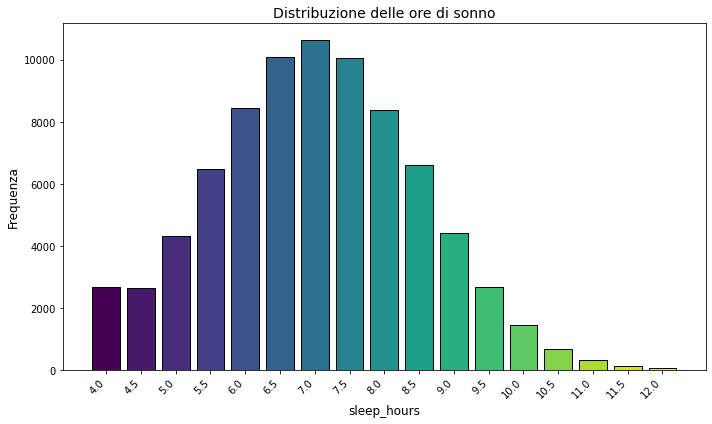

In [208]:
plot_bar(students, 'sleep_hours', n=30, 
         title='Distribuzione delle ore di sonno')

La maggior parte degli studenti dorme tra 6 e 8 ore a notte, con un picco a 7 ore. Sono pochi quelli che dormono meno di 5 o più di 9 ore. La curva è leggermente spostata verso destra a causa di un piccolo gruppo che dorme più a lungo.

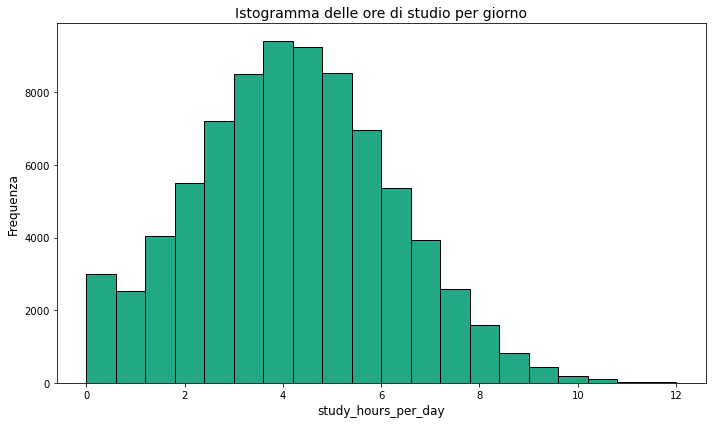

In [209]:
plot_hist(students, 'study_hours_per_day', bins=20, 
          title='Istogramma delle ore di studio per giorno')

La maggior parte degli studenti studia tra 2 e 6 ore al giorno, con un picco intorno alle 4 ore. Chi studia meno di un’ora o più di 8–9 ore è molto raro. La curva è un po’ spostata verso destra, perché c’è un piccolo gruppo di studiosi che fa sessioni di studio più lunghe, ma la maggioranza si ferma a tempi moderati.

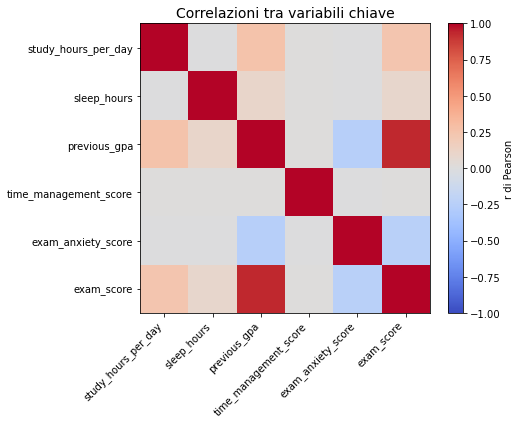

In [210]:
num_feats = [
    'study_hours_per_day', 'sleep_hours',
    'previous_gpa', 'time_management_score',
    'exam_anxiety_score', 'exam_score'
]
plot_correlation_heatmap(
    students,
    features=num_feats,
    title='Correlazioni tra variabili chiave'
)

Il grafico mostra quanto ogni variabile sia in correlazione con il punteggio d’esame:

* La media dei voti precedenti (previous\_gpa) è il fattore che predice meglio il risultato: più è alta, più sale anche il punteggio.
* Ore di studio e sonno aiutano un po’ (leggero effetto positivo), ma non in modo drammatico.
* L’ansia da esame fa l’opposto: più ansia, più basso tende a essere il punteggio.
* La gestione del tempo non sembra influire quasi per niente sui risultati.

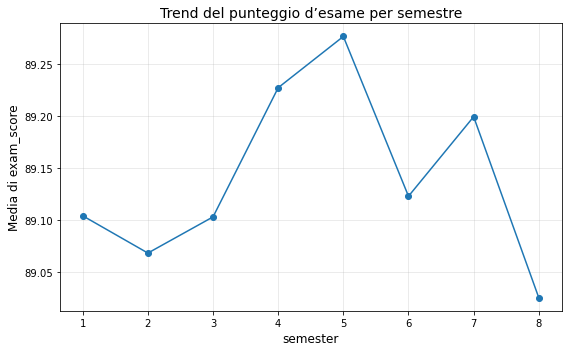

In [211]:
plot_line_trend(
    students,
    cat='semester',
    num='exam_score',
    title='Trend del punteggio d’esame per semestre'
)

Il grafico mostra che la media del punteggio d’esame rimane molto stabile intorno a 89 nel corso dei diversi semestri, con una lieve flessione nel secondo semestre, un picco nel quinto e un calo più marcato nell’ottavo. In generale, le variazioni sono contenute, suggerendo performance accademiche costanti durante tutto il percorso di studi.

#### Aspetto matematico

Per l'aspetto matematico andiamo a ricavare alcune statistiche descrittive sui dati degli studenti. In particolare prendiamo in analisi: la media ed il massimo e minimo nelle principali colonne.

In [212]:
studentDescribed = students.describe()

rows_to_drop = ['count', 'std', '25%', '50%', '75%']
filtered_studentDescribed = studentDescribed.drop(index=rows_to_drop)

filtered_studentDescribed = filtered_studentDescribed.drop(columns=["student_id"])

segment_size = 5 

for start in range(0, len(filtered_studentDescribed.columns), segment_size):
    stop = start + segment_size
    display(filtered_studentDescribed.iloc[:, start:stop])

,age,study_hours_per_day,attendance_percentage,previous_gpa,semester
mean,22.004288,4.174388,69.967884,3.602448,4.497338
min,16.000000,0.000000,40.000000,1.640000,1.000000
max,28.000000,12.000000,100.000000,4.000000,8.000000


,sleep_hours,exercise_frequency,mental_health_rating,stress_level,exam_anxiety_score
mean,7.017417,3.516587,6.804107,5.012478,8.508475
min,4.000000,0.000000,1.000000,1.000000,5.000000
max,12.000000,7.000000,10.000000,10.000000,10.000000


,screen_entertainment_hours,screen_productivity_hours,social_activity,screen_time,motivation_level
mean,4.49912,5.173909,2.500225,9.673029,5.488525
min,0.00000,0.000000,0.000000,0.300000,1.000000
max,9.00000,13.800000,5.000000,21.000000,10.000000


,time_management_score,exam_score
mean,5.499132,89.14135
min,1.000000,36.00000
max,10.000000,100.00000


- **Age**: Gli studenti hanno un'età media di circa 22 anni, con un range tra i 16 e i 28 anni, tipico di un'ampia fascia universitaria.
- **Study Hours per Day**: Il numero medio di ore di studio è 4.17, suggerendo che la maggior parte degli studenti dedica un tempo moderato allo studio giornaliero. Tuttavia, un massimo di 12 ore indicano alcuni outlier che potrebbero mettere molta enfasi sulla preparazione accademica.
- **Attendance Percentage**: La frequenza media è del 69.97%, con un minimo del 40% e massimo del 100%. Ciò indica una discreta variabilità nella partecipazione alle lezioni, cruciale per la performance accademica.
- **Previous GPA**: Con una media di 3.60, gli studenti mostrano un buon rendimento accademico precedente, evidenziato anche dal "massimo" di 4.0, il che rappresenta di solito il voto più elevato raggiungibile.
- **Semester**: La media è di 4.5, suggerendo che gli studenti si trovano per lo più a metà del loro percorso accademico, tra il primo e l'ultimo semestre.
- **Sleep Hours**: Gli studenti dormono mediamente 7 ore, che è vicino al raccomandato per la loro età. Tuttavia, alcuni studenti dormono solo 4 ore, potenzialmente influenzando negativamente la loro salute mentale e rendimento.
- **Exercise Frequency**: Con una media di 3.5, i dati indicano che gli studenti fanno esercizio regolarmente un paio di volte a settimana; il minimo di 0 segnala una totale assenza di attività fisica tra alcuni studenti.
- **Mental Health Rating e Stress Level**: La salute mentale media è valutata a 6.8 su 10, mentre il livello di stress è mediamente 5 su 10. Questo equilibrio suggerisce che, sebbene gli studenti affrontino stress, mantengono una salute mentale relativamente positiva.
- **Exam Anxiety Score**: Il livello di ansia è elevato, con una media di 8.5, indicando che gli esami sono una fonte significativa di pressione, potenzialmente impattando sulle performance.
- **Screen Entertainment e Productivity Hours**: Gli studenti passano più di 4 ore al giorno in attività di intrattenimento e poco più di 5 in attività produttive; la gestione del tempo tra intrattenimento e produttività è cruciale per la riuscita accademica.
- **Social Activity**: Con una media bassa di 2.5, l'interazione sociale può essere limitante ed è opportuno valutare se impatti sul benessere generale.
- **Motivation Level**: La motivazione media è 5.4, suggerendo che metà degli studenti potrebbe mancare di guida o interesse nei loro studi, un fattore che potrebbe ridurre l'engagement accademico complessivo.
- **Time Management Score**: In media 5.5, suggerisce che la gestione del tempo è moderata, con possibilità di miglioramento per molti studenti.

### Preparazione del modello
In questa sezione, prepareremo i dati per l'allenamento di un modello di machine learning. Seguiremo i seguenti passi:

1. **Gestione delle variabili categoriche**: Convertiremo le colonne categoriche in un formato numerico utilizzando tecniche come One-Hot Encoding.
2. **Selezione delle feature**: Identificheremo le colonne più rilevanti per predire il punteggio d'esame.
3. **Suddivisione dei dati**: Divideremo il dataset in set di addestramento e test.
4. **Standardizzazione dei dati numerici**: Trasformeremo i dati numerici per migliorare le performance del modello.

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

numerical_cols = students.select_dtypes(include=[np.number]).columns
print("Colonne numeriche:")
print(numerical_cols.tolist())

categorical_cols = students.select_dtypes(include=['category']).columns
print("Colonne categoriche:")
print(categorical_cols.tolist())

students_encoded = pd.get_dummies(students, columns=categorical_cols, drop_first=True)

print("Colonne dopo One-Hot Encoding:")
print(students_encoded.columns.tolist())

Colonne numeriche:
['student_id', 'age', 'study_hours_per_day', 'attendance_percentage', 'previous_gpa', 'semester', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'stress_level', 'exam_anxiety_score', 'screen_entertainment_hours', 'screen_productivity_hours', 'social_activity', 'screen_time', 'motivation_level', 'time_management_score', 'exam_score']
Colonne categoriche:
['gender', 'major', 'access_to_tutoring', 'diet_quality', 'parental_education_level', 'family_income_range', 'parental_support_level', 'learning_style', 'part_time_job', 'study_environment']
Colonne dopo One-Hot Encoding:
['student_id', 'age', 'study_hours_per_day', 'attendance_percentage', 'extracurricular_participation', 'previous_gpa', 'semester', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'stress_level', 'exam_anxiety_score', 'screen_entertainment_hours', 'screen_productivity_hours', 'social_activity', 'screen_time', 'internet_quality', 'motivation_level', 'time_management_score', '

#### Selezione delle feature
Per predire il punteggio d'esame (`exam_score`), selezioneremo le colonne più rilevanti. Escluderemo colonne come `student_id` che non hanno valore predittivo.

In [214]:
X = students_encoded.drop(columns=['student_id', 'exam_score'], errors='ignore')
y = students_encoded['exam_score']

print("Dimensioni del dataset delle feature:", X.shape)
print("Dimensioni del target:", y.shape)

Dimensioni del dataset delle feature: (80000, 52)
Dimensioni del target: (80000,)


#### Suddivisione dei dati
Divideremo i dati in un set di addestramento (70%) e un set di test (30%) per valutare le performance del modello.

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensioni del set di addestramento:", X_train.shape, y_train.shape)
print("Dimensioni del set di test:", X_test.shape, y_test.shape)

Dimensioni del set di addestramento: (56000, 52) (56000,)
Dimensioni del set di test: (24000, 52) (24000,)


#### Standardizzazione dei dati numerici
Standardizzeremo le feature numeriche per garantire che tutte abbiano media zero e varianza unitaria. Questo è particolarmente utile per algoritmi sensibili alle scale delle variabili.

In [216]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
	X_train_numeric = X_train.drop(columns=non_numeric_cols)
	X_test_numeric = X_test.drop(columns=non_numeric_cols)
else:
	X_train_numeric = X_train
	X_test_numeric = X_test

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

print("Esempio di dati standardizzati (prime 5 righe):")
print(X_train_scaled[:5])

Esempio di dati standardizzati (prime 5 righe):
[[ 1.06655212  0.17938419  1.72923622 -0.13581513 -1.08501796  2.03150206
   0.20971907 -2.19268722  1.11705122  0.83172701 -0.75777416 -0.27645622
   0.29484412 -0.7100885  -0.52193377 -0.53449031  1.41652744 -0.70563941
  -0.44493085 -0.44688773  2.24101605 -0.44369191 -0.451395   -0.9990005
  -0.9970757   2.22695953  1.98813586 -0.49910698 -0.49673332 -0.50267716
   1.41158493 -0.70575298 -0.32801667 -0.33909081 -0.33141201 -0.33270467
   2.99465526 -0.33630163 -0.33111327 -0.33068147 -0.33270467 -0.57883489
  -0.57883489 -0.57501337  1.00619778 -0.49726411 -0.50465536 -0.49609064
  -0.50075324]
 [-0.53885917  1.35848686  0.88704074  0.38262507  1.52785292 -1.16533431
  -0.22669235 -0.31457615 -0.26385547 -0.83531909  0.43645025  1.45073117
  -0.8803353   1.37820286  0.87261231 -0.07345784 -0.70595173 -0.70563941
   2.24754026 -0.44688773 -0.44622617 -0.44369191 -0.451395   -0.9990005
   1.00293287 -0.44904274 -0.50298374  2.00357846 -

### Preparazione del modello


#### Addestramento e Valutazione del Modello

In questa sezione, andremo a:

1. Scegliere e importare alcuni algoritmi di regressione.
2. Addestrare questi modelli sul X_train_scaled e y_train.
3. Fare previsioni sul X_test_scaled.
4. Valutare le performance dei modelli usando metriche di regressione appropriate.

Per la valutazione, useremo metriche comuni per i problemi di regressione:

- MAE (Mean Absolute Error): La media del valore assoluto degli errori. È facile da interpretare, indica l'errore medio in unità della variabile target.
- MSE (Mean Squared Error): La media dei quadrati degli errori. Penalizza maggiormente gli errori grandi.
- RMSE (Root Mean Squared Error): La radice quadrata del MSE. È nella stessa unità della variabile target ed è interpretabile.
- R² (R-squared): Il coefficiente di determinazione. Indica la proporzione della varianza nella variabile dipendente che è prevedibile dalle variabili indipendenti. Un valore più vicino a 1 indica un modello che spiega bene la variabilità dei dati.

# TODO verifcare librerie

In [217]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [218]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore") 

Procediamo con i seguenti quattro passaggi su diversi modelli per poterli paragonare:
1. Creazione del modello
2. Addestramento del modello
3. Effettuare previsioni sul set di test
4. Valutazione delle performance

Cominciamo con un modello semplice come la Regressione Lineare per avere un punto di riferimento.

In [219]:
lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, y_train)

y_pred_lin_reg = lin_reg.predict(X_test_scaled)

mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
rmse_lin_reg = np.sqrt(mse_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)


Passiamo poi al modello Ridge, in questo modello appere un iperparametro 'alpha' che adremo ad identificare grazie all'utilizzo delle Pipeline.

1. Definiamo la Pipeline per Ridge, abbiamo già i dati scalati (X_train_scaled, X_test_scaled), quindi non includiamo StandardScaler nella pipeline qui.
2. Definizione della griglia di iperparametri da esplorare per Ridge, nello specifico 'alpha'. Esploriamo una gamma logaritmica di valori per alpha.
3. Eseguiamo la Grid Search sul training set.
4. stampiamo infine gli iperparametri ottimali per Ridge


In [220]:


pipeline_ridge = Pipeline([
    ('ridge', Ridge(random_state=42))
])


param_grid_ridge = {
    'ridge__alpha': np.logspace(-3, 2, 6) 
}


grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5,
                                 scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)


grid_search_ridge.fit(X_train_scaled, y_train)

print("\nGrid Search per Ridge completata.")
print(f"Migliori parametri trovati per Ridge: {grid_search_ridge.best_params_}")
print(f"Miglior MAE (negativo) trovato in cross-validation per Ridge: {grid_search_ridge.best_score_:.2f}")

best_ridge_model = grid_search_ridge.best_estimator_
y_pred_best_ridge = best_ridge_model.predict(X_test_scaled)

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Grid Search per Ridge completata.
Migliori parametri trovati per Ridge: {'ridge__alpha': 0.001}
Miglior MAE (negativo) trovato in cross-validation per Ridge: -3.20


Ora che abbiamo ottenuto il valore ottimale per 'alpha' procedaimo all'utilizzo di Ridge.


In [221]:
ridge_reg = Ridge(alpha=0.001, random_state=42)

ridge_reg.fit(X_train_scaled, y_train)

y_pred_ridge_reg = ridge_reg.predict(X_test_scaled)

mae_ridge_reg = mean_absolute_error(y_test, y_pred_ridge_reg)
mse_ridge_reg = mean_squared_error(y_test, y_pred_ridge_reg)
rmse_ridge_reg = np.sqrt(mse_ridge_reg)
r2_ridge_reg = r2_score(y_test, y_pred_ridge_reg)

Ripetiamo il processo per un altro tipo di modello, ad esempio un RandomForestRegressor, che, al contrario dei precedenti non è più un modello lineare ma è un modello basato su ensemble learning ideato sul concetto di Bagging (Bootstrap Aggregating).

Inizialmente non scegliamo un numero di alberi (n_estimators) e una profondità massima (max_depth) ma ci affidiamo a quelli di default del modello per avere un termine di paragone con le prestazioni basate sugli iperparametri ottenuti dall'utilizzo della pipeline. La profondità massima non è esplicitamente settata dunque si utilizzarà il valore di default none che permette una profondità massima indefinita ovvero che cresce fino a che tutte le foglie non sono pure (cioè, contengono un solo valore target, o tutti gli elementi in quella foglia hanno lo stesso valore target). Settiamo inoltre n_jobs a -1 così da usare tutti i core della CPU.

In [222]:
rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_reg.fit(X_train_scaled, y_train)

y_pred_rf_reg = rf_reg.predict(X_test_scaled)

mae_rf_reg = mean_absolute_error(y_test, y_pred_rf_reg)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
rmse_rf_reg = np.sqrt(mse_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

Notiamo che l'incremento delle prestazioni in termini di risultati non è minimamante rilevante in relazione alle risorse computazionili allocate in più, si denota dunque una scelta quantomeno opportuna dei dei valori iniziali per numero di alberi (n_estimators) e profondità massima (max_depth).

Proceduamo ora ad utilizzare le pipeline per ricavare gli iperparametri più opportuni con cui settare il nostro modello. 

1. Definiamo la pipeline (non includendo StandardScaler perché X_train_scaled è già scalato).
2. Definiamo la griglia di iperparametri da esplorare per RandomForest.
3. Restituzione dei migliori iperparametri per Random Forest.


In [223]:
'''pipeline_rf = Pipeline([
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200], 
    'regressor__max_depth': [10, 20, None], 
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5,
                              scoring='neg_mean_absolute_error',
                              n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train_scaled, y_train)

print("\nGrid Search per RandomForest completata.")
print(f"Migliori parametri trovati: {grid_search_rf.best_params_}")
print(f"Miglior MAE (negativo) trovato in cross-validation: {grid_search_rf.best_score_:.2f}")


best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)'''

'pipeline_rf = Pipeline([\n    (\'regressor\', RandomForestRegressor(random_state=42, n_jobs=-1))\n])\n\nparam_grid_rf = {\n    \'regressor__n_estimators\': [50, 100, 200], \n    \'regressor__max_depth\': [10, 20, None], \n    \'regressor__min_samples_leaf\': [1, 2, 4]\n}\n\ngrid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5,\n                              scoring=\'neg_mean_absolute_error\',\n                              n_jobs=-1, verbose=2)\n\ngrid_search_rf.fit(X_train_scaled, y_train)\n\nprint("\nGrid Search per RandomForest completata.")\nprint(f"Migliori parametri trovati: {grid_search_rf.best_params_}")\nprint(f"Miglior MAE (negativo) trovato in cross-validation: {grid_search_rf.best_score_:.2f}")\n\n\nbest_rf_model = grid_search_rf.best_estimator_\ny_pred_best_rf = best_rf_model.predict(X_test_scaled)'

In [224]:
rf_reg_opt = RandomForestRegressor(n_estimators=200,    
                               max_depth=10,         
                               min_samples_leaf=4,   
                               random_state=120,     
                               n_jobs=-1)            

rf_reg_opt.fit(X_train_scaled, y_train)


y_pred_rf_reg_opt = rf_reg_opt.predict(X_test_scaled)


mae_rf_reg_opt = mean_absolute_error(y_test, y_pred_rf_reg_opt)
mse_rf_reg_opt = mean_squared_error(y_test, y_pred_rf_reg_opt)
rmse_rf_reg_opt = np.sqrt(mse_rf_reg_opt)
r2_rf_reg_opt = r2_score(y_test, y_pred_rf_reg_opt)

Dopo l'utilizzo delle pipeline siamo riusciti ad identificare un set di iperparametri per Random Forest opportuno per i nostri scopi infatti massimizza le prestazioni mantenedo un utilizzo delle risorse computazionali decisamente basso.

Come per Random Forest inizialmente non applichiamo iperparametri specifici ma ci limitiamo a sfruttare i default per avere un metro di misura efficace con il modello trinato con gli iperparametri ottimali.

In [225]:
dt_reg_default = DecisionTreeRegressor(random_state=42)
dt_reg_default.fit(X_train_scaled, y_train)
y_pred_dt_reg_default = dt_reg_default.predict(X_test_scaled)

mae_dt_reg_default = mean_absolute_error(y_test, y_pred_dt_reg_default)
mse_dt_reg_default = mean_squared_error(y_test, y_pred_dt_reg_default)
rmse_dt_reg_default = np.sqrt(mse_dt_reg_default)
r2_dt_reg_default = r2_score(y_test, y_pred_dt_reg_default)

Notiamo risultsati abbastanza deludenti rispetto ai precedenti modelli

1. Definizione della Pipeline per DecisionTreeRegressor.
2. Definizione della griglia di iperparametri da esplorare per DecisionTreeRegressor.
3. Esecuzione della Grid Search sul training set.

In [226]:
pipeline_dt = Pipeline([
    ('dt_regressor', DecisionTreeRegressor(random_state=42)) # 'dt_regressor' è il nome dello step nella pipeline
])

param_grid_dt = {
    'dt_regressor__max_depth': [5, 10, 15, 20, None], # Profondità massima dell'albero (None = illimitata)
    'dt_regressor__min_samples_leaf': [1, 5, 10, 20] # Numero minimo di campioni richiesti per essere un nodo foglia
}

grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5,
                              scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

grid_search_dt.fit(X_train_scaled, y_train)

print("\nGrid Search per DecisionTreeRegressor completata.")
print(f"Migliori parametri trovati per DecisionTreeRegressor: {grid_search_dt.best_params_}")
print(f"Miglior MAE (negativo) trovato in cross-validation per DecisionTreeRegressor: {grid_search_dt.best_score_:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Grid Search per DecisionTreeRegressor completata.
Migliori parametri trovati per DecisionTreeRegressor: {'dt_regressor__max_depth': 5, 'dt_regressor__min_samples_leaf': 1}
Miglior MAE (negativo) trovato in cross-validation per DecisionTreeRegressor: -3.23


In [227]:

dt_reg_opt = DecisionTreeRegressor(
    max_depth=5,           
    min_samples_leaf=1,    
    random_state=42        
)

dt_reg_opt.fit(X_train_scaled, y_train)

y_pred_dt_reg_opt = dt_reg_opt.predict(X_test_scaled)

mae_dt_reg_opt = mean_absolute_error(y_test, y_pred_dt_reg_opt)
mse_dt_reg_opt = mean_squared_error(y_test, y_pred_dt_reg_opt)
rmse_dt_reg_opt = np.sqrt(mse_dt_reg_opt)
r2_dt_reg_opt = r2_score(y_test, y_pred_dt_reg_opt)

In [229]:
print("\nLinear Regression:\n")
print(f"MAE (Mean Absolute Error): {mae_lin_reg:.2f}")
print(f"MSE (Mean Squared Error): {mse_lin_reg:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_lin_reg:.2f}")
print(f"R-squared: {r2_lin_reg:.2f}")

print("\nRidge Regression:\n")
print(f"MAE (Mean Absolute Error): {mae_ridge_reg:.2f}")
print(f"MSE (Mean Squared Error): {mse_ridge_reg:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_ridge_reg:.2f}")
print(f"R-squared: {r2_ridge_reg:.2f}")

print("\nRandom Forest Regressor (con iperparametri di default):\n")
print(f"MAE (Mean Absolute Error): {mae_rf_reg:.2f}")
print(f"MSE (Mean Squared Error): {mse_rf_reg:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_rf_reg:.2f}")
print(f"R-squared: {r2_rf_reg:.2f}")

print("\nRandom Forest Regressor (con iperparametri ottimizzati):\n") 
print(f"MAE (Mean Absolute Error): {mae_rf_reg_opt:.2f}")
print(f"MSE (Mean Squared Error): {mse_rf_reg_opt:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_rf_reg_opt:.2f}")
print(f"R-squared: {r2_rf_reg_opt:.2f}")

print("\nDecision Tree Regressor (con iperparametri di default):\n") 
print(f"MAE (Mean Absolute Error): {mae_dt_reg_default:.2f}")
print(f"MSE (Mean Squared Error): {mse_dt_reg_default:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_dt_reg_default:.2f}")
print(f"R-squared: {r2_dt_reg_default:.2f}")

print("\nDecision Tree Regressor (con iperparametri ottimizzati):\n") 
print(f"MAE (Mean Absolute Error): {mae_dt_reg_opt:.2f}")
print(f"MSE (Mean Squared Error): {mse_dt_reg_opt:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_dt_reg_opt:.2f}")
print(f"R-squared: {r2_dt_reg_opt:.2f}")


Linear Regression:

MAE (Mean Absolute Error): 3.20
MSE (Mean Squared Error): 17.58
RMSE (Root Mean Squared Error): 4.19
R-squared: 0.87

Ridge Regression:

MAE (Mean Absolute Error): 3.20
MSE (Mean Squared Error): 17.58
RMSE (Root Mean Squared Error): 4.19
R-squared: 0.87

Random Forest Regressor (con iperparametri di default):

MAE (Mean Absolute Error): 3.31
MSE (Mean Squared Error): 17.84
RMSE (Root Mean Squared Error): 4.22
R-squared: 0.87

Random Forest Regressor (con iperparametri ottimizzati):

MAE (Mean Absolute Error): 3.23
MSE (Mean Squared Error): 17.43
RMSE (Root Mean Squared Error): 4.17
R-squared: 0.87

Decision Tree Regressor (con iperparametri di default):

MAE (Mean Absolute Error): 4.48
MSE (Mean Squared Error): 36.54
RMSE (Root Mean Squared Error): 6.04
R-squared: 0.73

Decision Tree Regressor (con iperparametri ottimizzati):

MAE (Mean Absolute Error): 3.24
MSE (Mean Squared Error): 17.47
RMSE (Root Mean Squared Error): 4.18
R-squared: 0.87
